### 문제정의
농구 선수의 경기 기록을 바탕으로 그 선수의 포지션 예측

### 데이터 수집

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("./data/csv/basketball_stat.csv")

In [5]:
df.head()
# Player	
# Pos (SG, C)	
# 3P(3점슛)	
# 2P(2점슛)	
# TRB(리바운드)	
# AST(어시스트)	
# STL(스틸)	
# BLK(블로킹)

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1, 'STL and 2P in 2d plane')

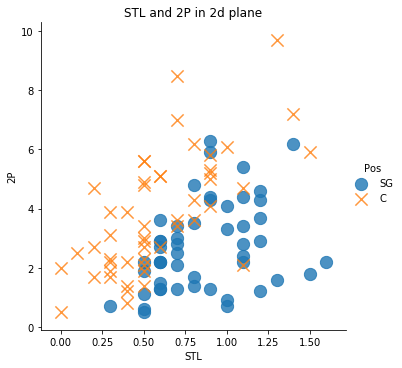

In [10]:
# 스틸, 2접슛 데이터 시각화
sns.lmplot('STL', '2P', data=df, fit_reg=False, # x 축, y 축, 라인 없음
          scatter_kws={"s": 150}, # 좌표 상의 점 크기
          markers=["o", "x"],
          hue="Pos") #예측값
plt.title("STL and 2P in 2d plane")

Text(0.5, 1, 'STL and AST in 2d plane')

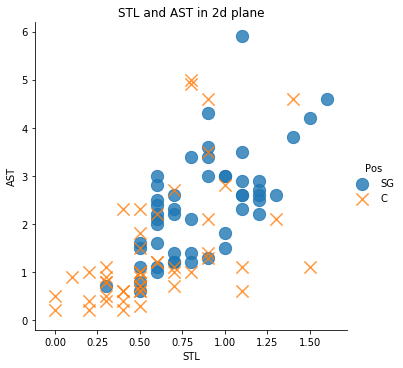

In [18]:
# 스틸, 어시스트 데이터 시각화
sns.lmplot('STL', 'AST', data=df, fit_reg=False, # x 축, y 축, 라인 없음
          scatter_kws={"s": 150}, # 좌표 상의 점 크기
          markers=["o", "x"],
          hue="Pos") #예측값
plt.title("STL and AST in 2d plane")

Text(0.5, 1, '3P and TRB in 2d plane')

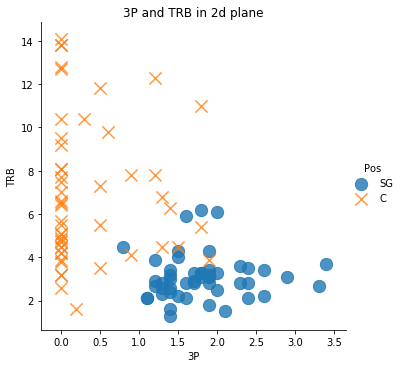

In [19]:
# 3점슛, 리바운드 데이터 시각화
sns.lmplot('3P', 'TRB', data=df, fit_reg=False, # x 축, y 축, 라인 없음
          scatter_kws={"s": 150}, # 좌표 상의 점 크기
          markers=["o", "x"],
          hue="Pos") #예측값
plt.title("3P and TRB in 2d plane")

Text(0.5, 1, '3P and BLK in 2d plane')

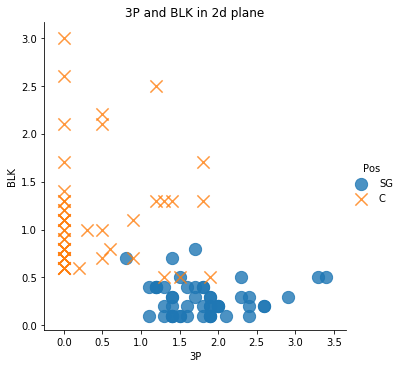

In [20]:
# 3점슛, 블로킹 데이터 시각화
sns.lmplot('3P', 'BLK', data=df, fit_reg=False, # x 축, y 축, 라인 없음
          scatter_kws={"s": 150}, # 좌표 상의 점 크기
          markers=["o", "x"],
          hue="Pos") #예측값
plt.title("3P and BLK in 2d plane")

### 데이터 다듬기

In [21]:
# 변렬력이 없는 특징을 제거
df.drop(['2P', 'AST', 'STL'], axis=1, inplace=True)

In [22]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


### 데이터 나누기 (학습, 테스트)

In [24]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [28]:
train.shape[0]

80

In [29]:
test.shape[0]

20

### 다듬어지니 데이터 저장

In [31]:
import pickle
with open('./Data/pkl/basketball_train.pkl', 'wb') as train_data:
    pickle.dump(train, train_data)
with open('./Data/pkl/basketball_test.pkl', 'wb') as test_data:
    pickle.dump(test, test_data)